# Data Science Project
## Analysis of the Young People Survey

Import needed libraries 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

Import dataset

In [51]:
# data
df = pd.read_csv('./dataSet/responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [53]:
# explanation for the columns names
# see description.txt for details
df_columns = pd.read_csv('./dataSet/columns.csv')
df_columns.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


Data Check for empty columns

In [58]:
for col in df.columns:
    if(np.sum(df[col].isnull()) != 0):
        print("Number of empty columns: ", np.sum(df[col].isnull()), ", column name: ", col)
        
# for row in range(len(df.Snakes)):  
#     #print("start: row: ", row, " ,",df.Snakes[row])
#     if(df.Snakes[row] == 0):
#         print("I'm here")

Number of empty columns:  3 , column name:  Music
Number of empty columns:  2 , column name:  Slow songs or fast songs
Number of empty columns:  4 , column name:  Dance
Number of empty columns:  5 , column name:  Folk
Number of empty columns:  5 , column name:  Country
Number of empty columns:  7 , column name:  Classical music
Number of empty columns:  2 , column name:  Musical
Number of empty columns:  3 , column name:  Pop
Number of empty columns:  6 , column name:  Rock
Number of empty columns:  3 , column name:  Metal or Hardrock
Number of empty columns:  8 , column name:  Punk
Number of empty columns:  4 , column name:  Hiphop, Rap
Number of empty columns:  7 , column name:  Reggae, Ska
Number of empty columns:  6 , column name:  Swing, Jazz
Number of empty columns:  7 , column name:  Rock n roll
Number of empty columns:  7 , column name:  Alternative
Number of empty columns:  8 , column name:  Latino
Number of empty columns:  7 , column name:  Techno, Trance
Number of empty colu

Find interesting correletion between two data subsets:

(One side: DEMOGRAPHICS)

(Another side: SPENDING HABITS) 


create two subsets for correlation analysis:

In [115]:
# first:
demographic_data = df.iloc[:,[140,143,144, 146, 147, 148, 149]]
print("Size: ", demographic_data.shape)
demographic_data.head()

Size:  (1010, 7)


,Age,Number of siblings,Gender,Education,Only child,Village - town,House - block of flats
0,20.0,1.0,female,college/bachelor degree,no,village,block of flats
1,19.0,2.0,female,college/bachelor degree,no,city,block of flats
2,20.0,2.0,female,secondary school,no,city,block of flats
3,22.0,1.0,female,college/bachelor degree,yes,city,house/bungalow
4,20.0,1.0,female,secondary school,no,village,house/bungalow


In [116]:
# second:
spending_habits = df.iloc[:,133:139]
print("Size: ", spending_habits.shape)
spending_habits.head()

Size:  (1010, 6)


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
0,3.0,4.0,5.0,3.0,3.0,1
1,3.0,4.0,1.0,4.0,2.0,5
2,2.0,4.0,1.0,4.0,3.0,4
3,2.0,4.0,3.0,3.0,4.0,4
4,4.0,3.0,4.0,3.0,3.0,2


Marge subsets

In [120]:
#marge both subsets
corr_df = pd.concat([demographic_data,spending_habits], axis = 1)
# get rid of empty cells:
corr_df[corr_df.columns].replace('', np.nan)
corr_df = corr_df.dropna(subset=corr_df.columns,how='any')
print(corr_df.shape)
corr_df.head()

(974, 13)


,Age,Number of siblings,Gender,Education,Only child,Village - town,House - block of flats,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
0,20.0,1.0,female,college/bachelor degree,no,village,block of flats,3.0,4.0,5.0,3.0,3.0,1
1,19.0,2.0,female,college/bachelor degree,no,city,block of flats,3.0,4.0,1.0,4.0,2.0,5
2,20.0,2.0,female,secondary school,no,city,block of flats,2.0,4.0,1.0,4.0,3.0,4
3,22.0,1.0,female,college/bachelor degree,yes,city,house/bungalow,2.0,4.0,3.0,3.0,4.0,4
4,20.0,1.0,female,secondary school,no,village,house/bungalow,4.0,3.0,4.0,3.0,3.0,2


Correlation:

In [124]:
corr1 = corr_df.corr()
corr1.head()

,Age,Number of siblings,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
Age,1.000000,0.096078,0.024421,-0.149216,-0.079496,-0.044964,-0.087260,-0.012519
Number of siblings,0.096078,1.000000,-0.036574,-0.065518,-0.044409,0.022397,-0.038236,-0.026424
Finances,0.024421,-0.036574,1.000000,-0.057614,-0.133255,-0.299476,-0.211435,-0.101572
Shopping centres,-0.149216,-0.065518,-0.057614,1.000000,0.364625,0.133551,0.490744,0.156364
Branded clothing,-0.079496,-0.044409,-0.133255,0.364625,1.000000,0.344507,0.411229,0.345098


<AxesSubplot:>

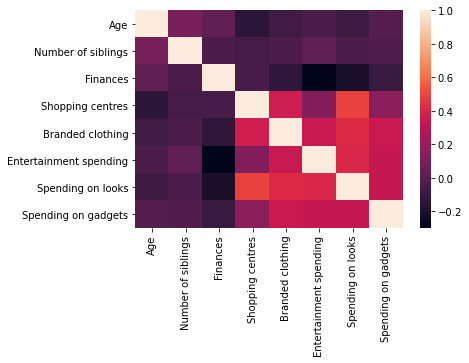

In [127]:
#plot
sns.heatmap(corr1)
